# Processing images with Numpy

In [1]:
# We'll use all this libraries in this notebook
import matplotlib as plt
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

# To use if you're on dark theme
plt.style.use("dark_background")

# Let's create a ndarray from an internet image

In [2]:
# With the Image class you can open a url using the class request and the method "urlopen()"
url = "https://wallpapers.com/images/hd/road-passing-forest-high-resolution-4a8rngpyj7unyn4x.webp"
# 1920 x 1200
internet_image = Image.open(urllib.request.urlopen(url))

In [3]:
"""
Now we transform the image into an array
we'll prepare 3 separate arrays to use for later in different cases 
"""
image1 = np.array(internet_image)
image2 = np.array(internet_image)
image3 = np.array(internet_image)

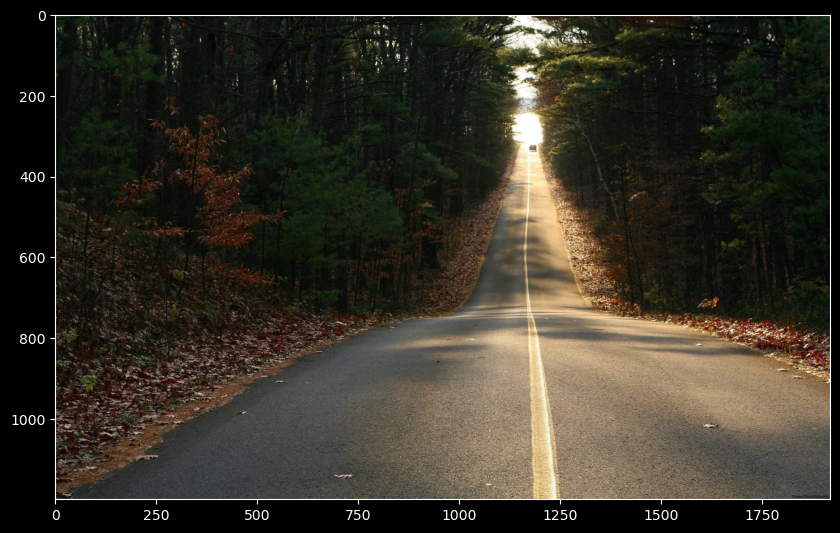

In [4]:
# Let's print the image and see how is it viewed with matplotlib
plt.figure(figsize =(10,20))
plt.imshow(image1)

In [5]:
# Let's see the shape now
print(image1.shape)
print("Quantity of values:",1200 * 1920 * 3)
# This is the same as asking the size
print(image1.size)

(1200, 1920, 3)
Quantity of values: 6912000
6912000


In [6]:
# Let's see what's the minimum and maximum value in each data (pixels in this case)
print(np.amin(image1), np.amax(image1))

0 255


In [7]:
print("Full row")
print(image1[150]) #Print a row
print("____________________")
print("")

Full row
[[35 44 18]
 [35 44 18]
 [32 40 17]
 ...
 [ 5 11  2]
 [ 7 13  4]
 [10 16  7]]
____________________



In [8]:
print("Full column")
print(image1[:, 150]) #The colon means from minimum to maximum row value
print("______________________")

Full column
[[17 19 19]
 [10 12 12]
 [ 9 11 10]
 ...
 [51 53 54]
 [54 56 58]
 [52 54 56]]
______________________


In [9]:
print("")
print("3 colors of the pixel 150, 150")
print(image1[150,150]) # You won't get a single value from a coordinate since pixels have 3 values each
print("________________")


3 colors of the pixel 150, 150
[53 35 20]
________________


In [10]:
print("")
print("The value of the blue color of pixel 150, 150")
print(image1[150,150,2])


The value of the blue color of pixel 150, 150
20


# Modifying the image

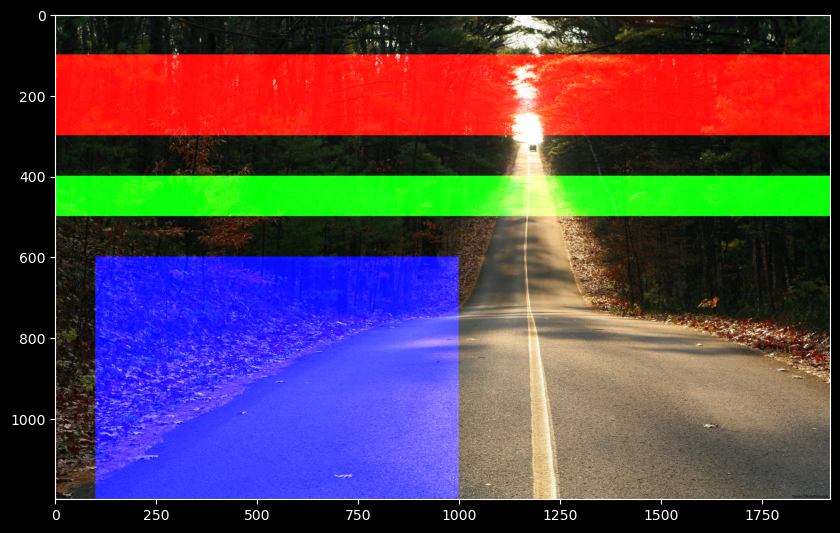

In [11]:
# We select the rows from 100 to 300, all the columns and the red color and let's get it to maximum value
image2[100:300, : , 0] = 255 # This is red colour (0)
image2[400:500, : , 1] = 255 # This is green colour (1)
image2[600:, 100:1000 , 2] = 255 # This is blue colour (2)
plt.figure(figsize=(10,20))
plt.imshow(image2)

In [12]:
"""
We'll create a filter that selects all pixels that are less than 150,
this will create a boolean array of the same size as the image
where each pixel that is <150 will be True
"""
filter = image3 > 150
print(filter.shape)
print(image3.shape)
#This confirms that the filter and the image have the same shape

(1200, 1920, 3)
(1200, 1920, 3)


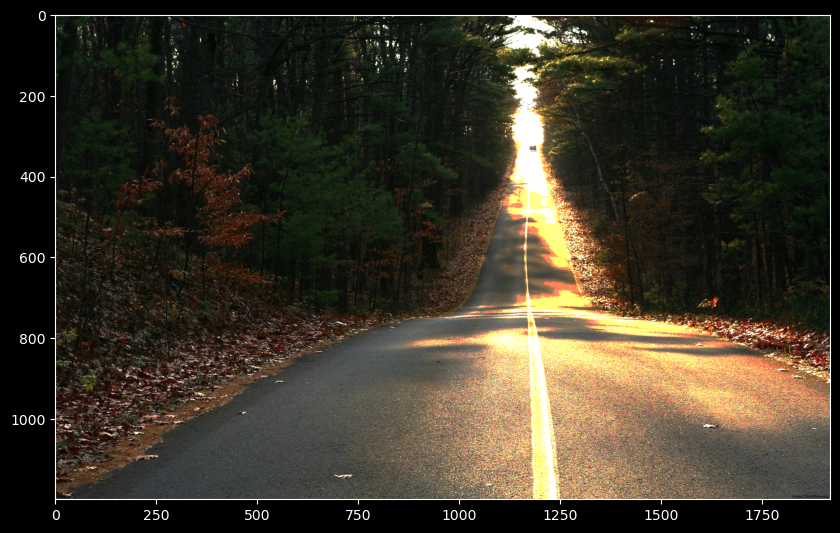

In [13]:
# We apply the filter setting to 0 all those pixels
image3[filter] = 255
plt.figure(figsize=(10,20))
plt.imshow(image3)

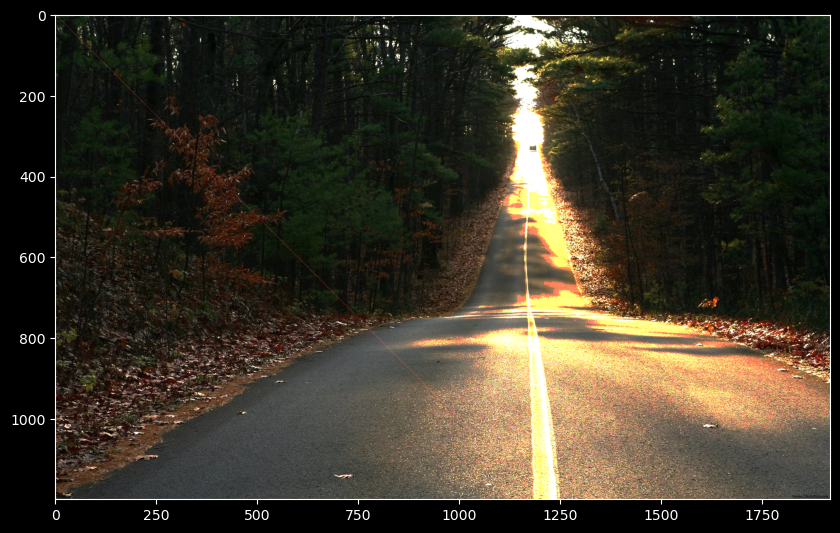

In [14]:
# We create two arrays with a succession of integers from 0 to 1200
array_a = np.array(range(1200))
array_b = np.array(range(1200))
# We will only set height and width, not color, to 255.
image3[array_a, array_b, 0] = 255;
plt.figure(figsize=(10,20))
plt.imshow(image3)

# Creating a circular mask

##### API: https://numpy.org/doc/stable/reference/generated/numpy.ogrid.html



This process is very similar to making a circle with a compass, so the first thing we should do is finding out the center of the image, dividing the width and height by 2; now with the center acquired, we should calculate the distance between all points to the central one:

distance = position_x/y - center_position_x/y

But if we do this we'll have negative results, so to fix this we'll square the numbers:

distance = (position_x/y - center_positionx/y)${^2}$

Finally we can broadcast the results to the other positions.

In [24]:
# This is the shape of image1, we'll obtain the rows, columns and layers; let's save every value in a variable
image1.shape
"""
Numpy's ogrid creates an instance which returns an open multi-dimensional "meshgrid"; you have to pass the columns
and rows
"""
total_rows, total_cols, total_layers = image1.shape
# Like we said in the explanation above, X and Y.
X, Y = np.ogrid[:total_rows, :total_cols]
# The shapes are vertical for X and horizontal for Y
print("X= ",X.shape, " and Y = ", Y.shape)
print("\nX shape:\n", X)
print("\nY shape:\n",Y)


X=  (1200, 1)  and Y =  (1, 1920)

X shape:
 [[   0]
 [   1]
 [   2]
 ...
 [1197]
 [1198]
 [1199]]

Y shape:
 [[   0    1    2 ... 1917 1918 1919]]


In [26]:
# Calculating the center's index by column and rows
center_row, center_col = total_rows/2, total_cols / 2
print("Central row:",center_row,"\nCentral column:",center_col)

Central row: 600.0 
Central column: 960.0


In [31]:
# Now let's calculate the distance to center and bring it into an array by broadcasting both results
dist_from_center = (X - center_row)**2 + (Y-center_col)**2

print("\nArray that contains the distances to center:\n")
print(dist_from_center)

print("\nThis is the maximum distance:",np.amax(dist_from_center))


Array that contains the distances to center:

[[1281600. 1279681. 1277764. ... 1275849. 1277764. 1279681.]
 [1280401. 1278482. 1276565. ... 1274650. 1276565. 1278482.]
 [1279204. 1277285. 1275368. ... 1273453. 1275368. 1277285.]
 ...
 [1278009. 1276090. 1274173. ... 1272258. 1274173. 1276090.]
 [1279204. 1277285. 1275368. ... 1273453. 1275368. 1277285.]
 [1280401. 1278482. 1276565. ... 1274650. 1276565. 1278482.]]

This is the maximum distance: 1281600.0


In [32]:
# Now let's calculate the size of the desired radius; we square the radius because distances are also squared
radius = (total_rows / 2)**2
print("The radius is:",radius)

The radius is: 360000.0


In [33]:
#Now let's create the mask; we'll have True in the outer circle parts and False in the inner circle parts
circular_mask = (dist_from_center > radius)
print(circular_mask.shape)
# This zone is inner circle
print(circular_mask[300:600,600:1000])
#And this are the outer parts of the circle
print(circular_mask)


(1200, 1920)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


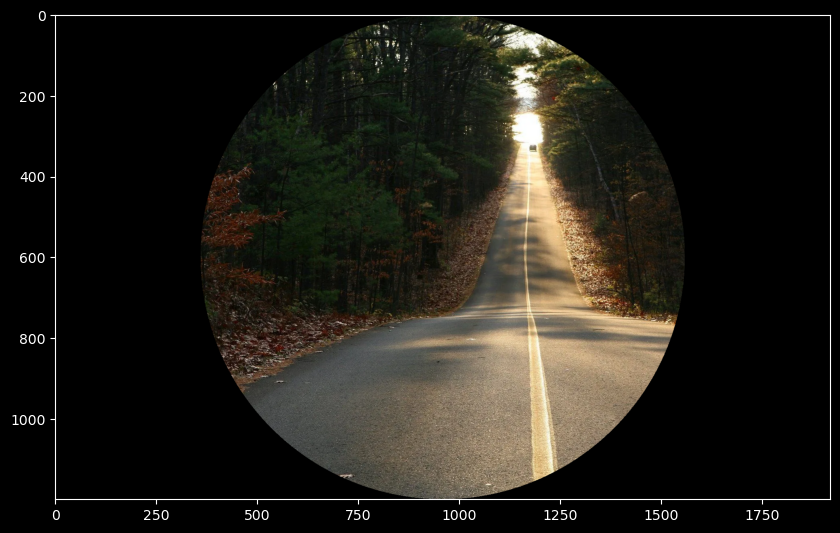

In [34]:
# And now we apply the mask to the image; we want to 0 the True parts of the image (0 red, 0 green, 0 blue)
image1[circular_mask] = 0
plt.figure(figsize=(10,20))
plt.imshow(image1)